In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib notebook

In [5]:
import os
import json

import numpy as np
import pandas as pd

from utils.process_rtog_nii import process_rtog_nii
from utils.mri_viewer import MRIViewer
import nibabel

# Run preprocessing

In [1]:
patient_number = 101
patient_str = str(patient_number)

In [3]:
process_rtog_nii("/local-scratch/marcthib_scratch/rtog/", 
                 input_t1c_filename=patient_str + 't1c.nii', output_t1c_filename=patient_str + 't1c_proc.nii',
                 input_flair_filename=patient_str + 'flair.nii', output_flair_filename=patient_str + 'flair_proc.nii',)

fsl_anat -i /local-scratch/marcthib_scratch/rtog/9999t1c.nii -o /local-scratch/marcthib_scratch/rtog/tmp/T1 -t T1 --noreg --nononlinreg --noseg --nosubcortseg
fsl_anat -i /local-scratch/marcthib_scratch/rtog/9999flair.nii -o /local-scratch/marcthib_scratch/rtog/tmp/T2 -t T2 --noreg --nononlinreg --noseg --nosubcortseg
bet /local-scratch/marcthib_scratch/rtog/t1c_fsl_anat.nii /local-scratch/marcthib_scratch/rtog/t1c_bet.nii -f 0.5 -g 0.0
bet /local-scratch/marcthib_scratch/rtog/flair_fsl_anat.nii /local-scratch/marcthib_scratch/rtog/flair_bet.nii -f 0.5 -g 0.0
reg_aladin -ref /local-scratch/marcthib_scratch/rtog/t1c_bet.nii.gz -flo /local-scratch/marcthib_scratch/rtog/flair_bet.nii.gz -aff /home/marcthib/research/romain/rtog/reg.txt -res /local-scratch/marcthib_scratch/rtog/flair_reg_aladin.nii -rigOnly


# Compare before and after pre-processing

In [3]:
patient_number = 101
# scratch_folder = "/local-scratch/marcthib_scratch/rtog"
scratch_folder = "/local-scratch/rsub_scratch/rtog"

In [6]:
viewer_args = []

for image_definition in ['t1c', 'flair', 't1c_proc', 'flair_proc']:
    image_path = os.path.join(scratch_folder, str(patient_number) + image_definition + '.nii')
    nibabel_item = nibabel.load(image_path)
    image_data = nibabel_item.get_data()
    image_data[np.isnan(image_data)] = 0.
    viewer_args.append(np.swapaxes(image_data, 0, 2))

viewer_args.append(None)
for image_definition in ['t1c', 'flair', 't1c_proc', 'flair_proc']:
    viewer_args.append(image_definition)

<IPython.core.display.Javascript object>


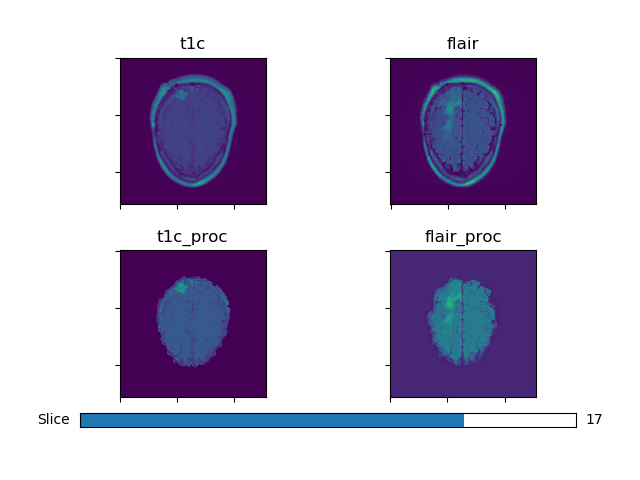

In [7]:
MRIViewer(*viewer_args)